In [1225]:
## load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
RSEED=42

In [1226]:
def RMSE(x,y):
    return np.sqrt(np.mean(pow((x-y),2)))    

In [1227]:
df=pd.read_csv('data/train_modelling.csv')
df.head()

,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,target
0,22.299527,0.000000,0.758530,209.574655,0.677348,45.126304
1,24.679063,0.007025,0.758058,177.109855,0.899208,79.131702
2,24.112317,0.151767,0.712944,201.373211,1.038656,32.661304
3,20.845273,1.127273,0.898326,259.973977,1.365202,53.850238
4,21.870732,0.005100,0.785134,181.944779,0.729763,177.418750


In [1228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_temp          15539 non-null  float64
 1   mean_precip        15539 non-null  float64
 2   mean_rel_humidity  15539 non-null  float64
 3   mean_wind_dir      15539 non-null  float64
 4   mean_wind_spd      15539 non-null  float64
 5   target             15539 non-null  float64
dtypes: float64(6)
memory usage: 728.5 KB


In [1229]:
# perform and evaluate baseline model
y_pred_baseline = np.ones(df.target.shape[0]) * np.mean(df.target)
score = RMSE(df.target,y_pred_baseline)
print(score)


42.372336436960055


In [1230]:
X,y=df.iloc[:,:-1],df.iloc[:,-1]

In [1231]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=RSEED)

<AxesSubplot:>

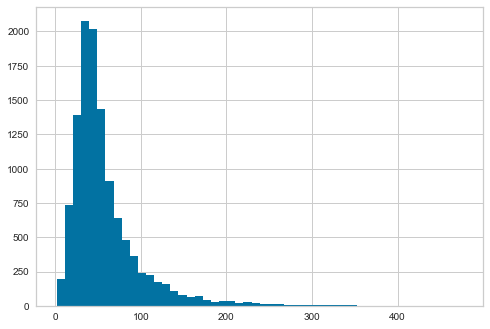

In [1232]:
y_train.hist(bins=50)

<AxesSubplot:>

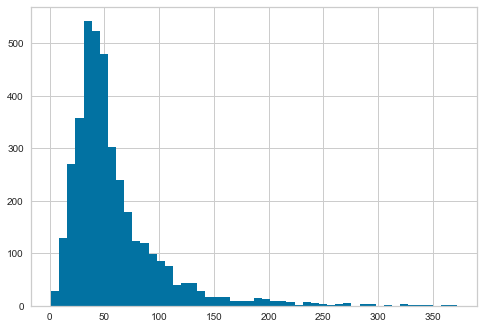

In [1233]:
y_test.hist(bins=50)

In [1234]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [1235]:
linear.coef_

array([ -7.55220727,  -8.86381762, -75.72039278,   0.11294901,
        -4.90435158])

In [1236]:
linear.intercept_

274.5506999521161

In [1237]:
y_pred_train=linear.predict(X_train)
y_pred_test=linear.predict(X_test)

print(f'train_pred: {y_pred_train.shape} test_pred: {y_pred_test.shape}')


train_pred: (11654,) test_pred: (3885,)


In [1238]:
print(f'RMSE_train: {RMSE(y_pred_train,y_train).round(2)} RMSE_test: {RMSE(y_pred_test,y_test).round(2)}')

RMSE_train: 41.02 RMSE_test: 41.88


In [1239]:
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred_test)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))}')
print(f'R_Squared: {metrics.r2_score(y_test,y_pred_test)}')

MAE: 27.959520712589953
MSE: 1754.2365715521034
RMSE: 41.88360743240849
R_Squared: 0.055194283128565336


In [1240]:
import statsmodels.formula.api as smf
model=smf.ols(formula='target~ mean_temp \
                        + mean_precip + mean_rel_humidity \
                        + mean_wind_dir + mean_wind_spd',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     174.6
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          2.29e-181
Time:                        01:05:05   Log-Likelihood:                -79841.
No. Observations:               15539   AIC:                         1.597e+05
Df Residuals:                   15533   BIC:                         1.597e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           283.8865     18.913     15.010      0.000     246.815     320.958
mean_temp            -7.8431      0.493    -15.922      0.000      -8.809      -6.878
mean_precip         -11.4714      1.889     -6.073      0.000     -15.174      -7.769
mean_rel_humidity   -74.5698      9.483     -7.864      0.000     -93.157     -55.982
mean_wind_dir         0.1003      0.013      7.733      0.000       0.075       0.126
mean_wind_spd        -5.3621      0.678     -7.904      0.000      -6.692      -4.032
==============================================================================
Omnibus:                     8738.363   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85531.056
Skew:                           2.561   Prob(JB):                         0.00
Kurtosis:                      13.290   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1241]:
linear.coef_

array([ -7.55220727,  -8.86381762, -75.72039278,   0.11294901,
        -4.90435158])

# Scaling

In [1242]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.values)
X_test_scaled=scaler.transform(X_test.values)

In [1243]:
scaler.mean_

array([2.27759105e+01, 1.65478069e-01, 7.95042196e-01, 1.97671027e+02,
       1.06742058e+00])

In [1244]:
scaler.scale_

array([ 1.31868115,  0.2037525 ,  0.07102313, 31.06790217,  0.62220181])

In [1245]:
X_train_scaled.mean(axis=0)

array([-1.38035761e-15, -2.98752309e-17, -1.74892040e-15,  6.05735548e-16,
       -5.95980371e-17])

In [1246]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1.])

In [1247]:
linear.fit(X_train_scaled,y_train)

LinearRegression()

# Decision Tree

In [1248]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [1249]:
y_pred_tree=tree.predict(X_test)

In [1250]:
score=tree.score(X_test,y_test)
print(f'R_squared: {score}')

R_squared: 0.26603169411916694


In [1251]:
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred_tree)}')
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred_tree)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_tree))}')
print(f'R_Squared: {metrics.r2_score(y_test,y_pred_tree)}')

MAE: 21.349101905809984
MSE: 1362.771225389932
RMSE: 36.91573140803162
R_Squared: 0.26603169411916694


# Random Forest

In [1252]:
from sklearn.ensemble import RandomForestRegressor

def estimator(n):
    score=[]
    estimator=[]
    R_2=[]
    for i in range(n,pow(n,2)+1,10):
        forest = RandomForestRegressor(n_estimators=i,
                                        criterion='squared_error',
                                        max_depth=None,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        min_weight_fraction_leaf=0.0,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        bootstrap=True,
                                        oob_score=False,
                                        n_jobs=None,
                                        random_state=RSEED,
                                        verbose=0,
                                        warm_start=False,
                                        ccp_alpha=0.0,
                                        max_samples=None)
        forest.fit(X_train.values,y_train.values)
        y_pred_forest=forest.predict(X_test.values)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test.values,y_pred_forest)).round(4)
        R_sqr = forest.score(X_test.values,y_test.values).round(4)
        #value=print(f'tree size: {i} RMSE: {RMSE} R2: {R_sqr}')
        score.append(RMSE)
        estimator.append(i)
        R_2.append(R_sqr)
        plt.title("RMSE convergence")
        plt.xlabel("$n_{estimator}$")
        plt.ylabel(r"$RMSE$")
    sns.stripplot(x=estimator, y=score)
    
    return y_pred_forest,forest,print(f'RMSE: {min(score)} R_sqr: {R_sqr}')
  

RMSE: 28.5235 R_sqr: 0.5618
RMSE: 28.5235 R_sqr: 0.5618


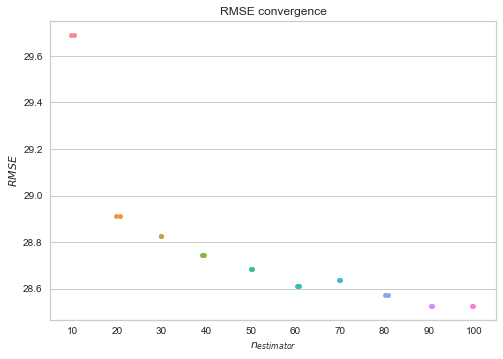

In [1253]:
y_pred_forest,forest=estimator(10)[0],estimator(10)[1]

# Residual plots
[Residuals_Plots](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)

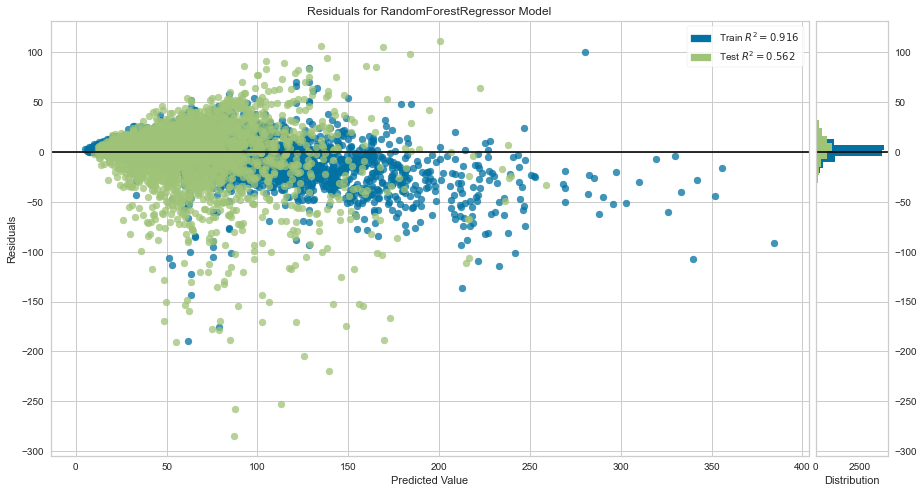

In [1254]:
from yellowbrick.regressor import ResidualsPlot
fig=plt.figure(figsize=(15,8))
visualizer = ResidualsPlot(forest)
visualizer.fit(X_train.values, y_train.values)  
visualizer.score(X_test.values, y_test.values)  
visualizer.show()
plt.show()

In [1255]:
y_pred_forest.shape[0]
y_test=[val for i,val in enumerate(y_test)]
y_pred=[val for i,val in enumerate(y_pred_forest)]


In [1256]:
# calculate residuals
residuals = np.array([y_test[i]-y_pred[i] for i in range(y_pred_forest.shape[0])])
residuals.shape

(3885,)

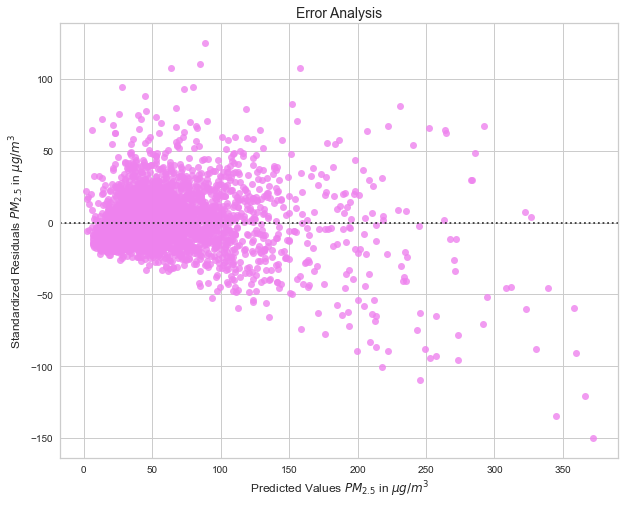

In [1282]:
fig=plt.figure(figsize=(10,8))
plt.title('Error Analysis',fontsize=14)
plt.xlabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)
plt.ylabel('Standardized Residuals $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)

sns.residplot(x=y_test, y=y_pred_forest, data=None, lowess=False, 
x_partial=None, y_partial=None, order=0.5, robust=True, dropna=True, 
label=None, color='violet', scatter_kws=None, line_kws=None, ax=None)
plt.show()

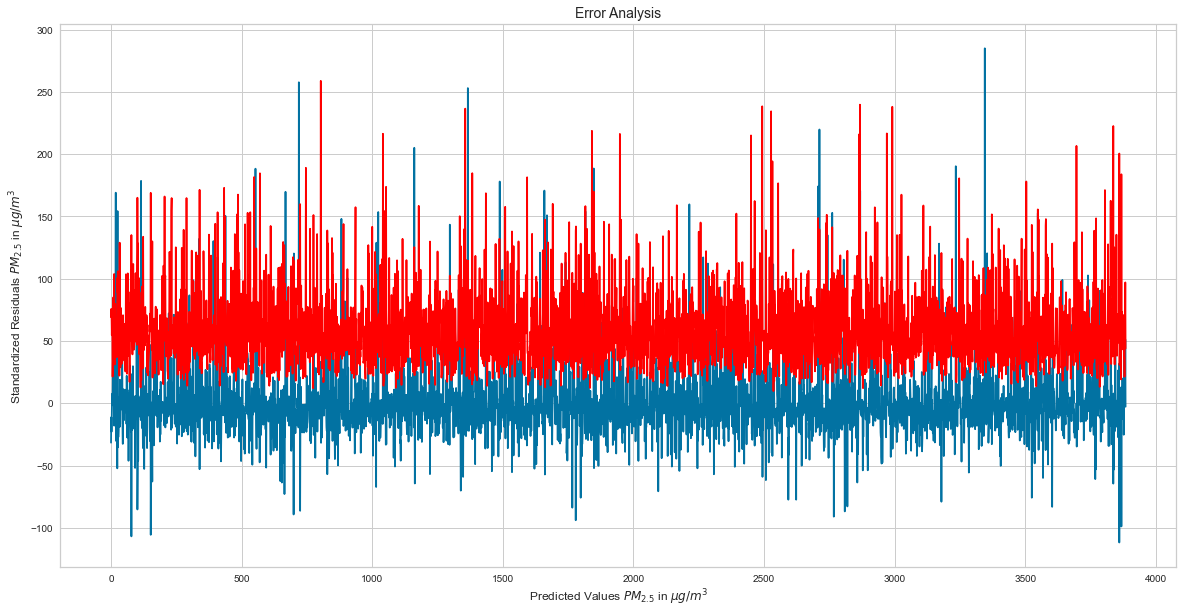

In [1283]:

fig=plt.figure(figsize=(20,10))
plt.title('Error Analysis',fontsize=14)
plt.xlabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)
plt.ylabel('Standardized Residuals $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)

plt.plot(residuals)
plt.plot(y_pred_forest, color='red')
plt.show()

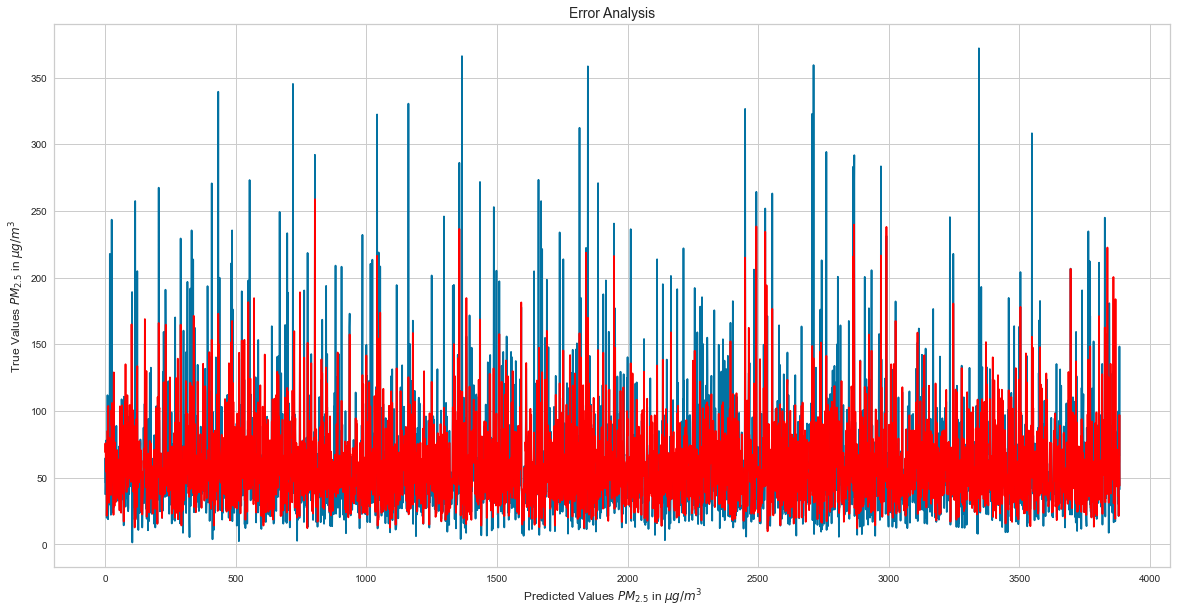

In [1288]:
fig=plt.figure(figsize=(20,10))
plt.title('Error Analysis',fontsize=14)
plt.xlabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)
plt.ylabel('True Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)
plt.plot(y_test)
plt.plot(y_pred_forest, color='red')
plt.show()

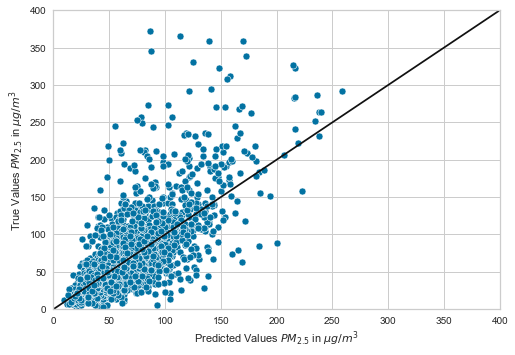

In [1289]:
fig,ax=plt.subplots()
sns.scatterplot(x=y_pred_forest,y=y_test,ax=ax)

ax.set_xlabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$')
ax.set_ylabel('True Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$')
ax.set_xlim([0,400])
ax.set_ylim([0,400])
ax.plot(range(400),range(400),color='k')


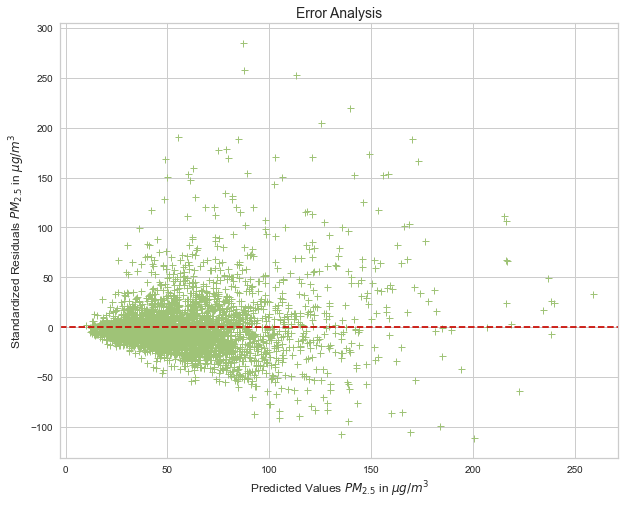

In [1261]:
fig=plt.figure(figsize=(10,8))
plt.title('Error Analysis',fontsize=14)
plt.xlabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)
plt.ylabel('Standardized Residuals $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)
plt.scatter(y_pred_forest,residuals,marker='+',linewidths=1,color='g')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

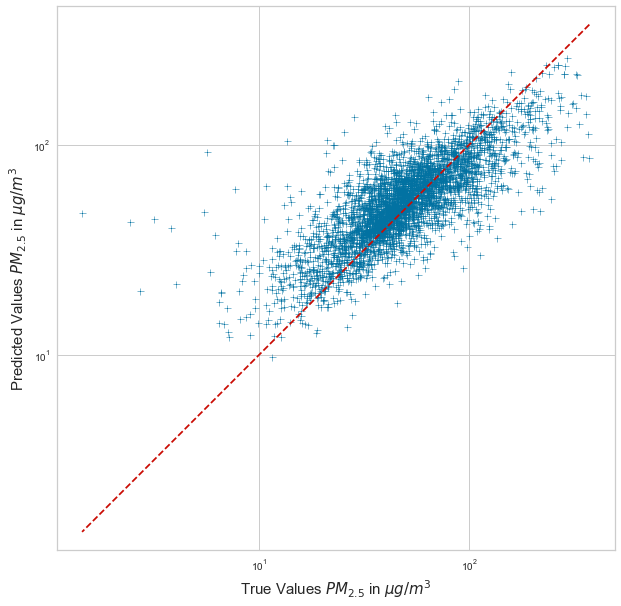

In [1262]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_forest, marker='+',linewidths=0.5,color='b')
plt.yscale('log')
plt.xscale('log')
ax1 = max(max(y_pred_forest), max(y_test))
ax2 = min(min(y_pred_forest), min(y_test))
plt.plot([ax1, ax2], [ax1, ax2], 'r--')
plt.xlabel('True Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=15)
plt.ylabel('Predicted Values $PM_{2.5}$ in ${\mu g}/{m^{3}}$', fontsize=15)
plt.axis('equal')
plt.show()

# Evaluation - Random Forest

In [1263]:
class Score:
    def __init__(self,*args):
        self.args=args
    def mean(self):
        return [np.mean(val) for _,val in enumerate(self.args)]
    def std(self):
        return [np.std(val) for _,val in enumerate(self.args)]
    def var(self):
        return [np.divide(np.std(val),np.mean(val)) for _,val in enumerate(self.args)]

def main():
    score=Score(y_test,y_pred_tree,y_pred_forest)
    mean=score.mean()
    std=score.std()
    var=score.var()
    print(f'mean: {mean}')
    print(f'std: {std}')
    print(f'variation: {var}')

if __name__=='__main__':
    main()

mean: [59.07053771715719, 58.88406637656726, 59.274542427899796]
std: [43.089635875447186, 41.1317141131989, 29.51147408927408]
variation: [0.7294607014036321, 0.6985202728724446, 0.49787772086425075]


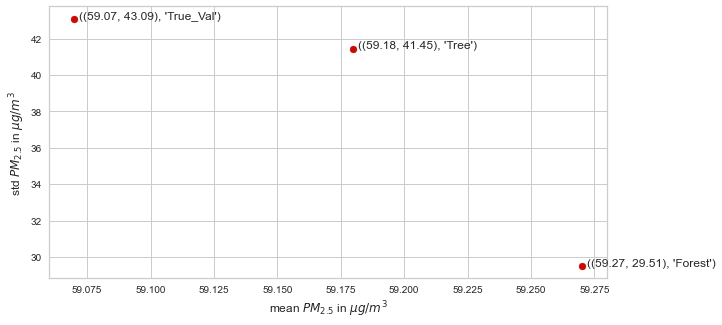

In [1264]:
def annotation(val, dict, words,mean,std):
    l=[(i.round(2),j.round(2)) for i in mean for j in std][::4]
    for word in words:
        x, y = val[dict[word]]
        plt.scatter(x, y, marker='o', color='r')
        plt.text(x+.002, y+.002, word, fontsize=12)
    plt.show()

fig=plt.figure(figsize=(10,5))
plt.xlabel('mean $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)
plt.ylabel('std $PM_{2.5}$ in ${\mu g}/{m^{3}}$',fontsize=12)

l=[(i.round(2),j.round(2)) for i in mean for j in std][::4]
a,b,c=map(str,l)
index=[0,1,2]
name=['True_Val','Tree','Forest']

plt_dict =dict(zip(zip(l,name),index))
text = zip(l,name)
annotation(l, plt_dict, text,mean,std)